# 第九讲 Matplotlib

MATLAB是科学计算和可视化领域广泛使用的语言和工具，是一种面向过程的计算机语言。

作为Scipy生态的一部分，matplotlib是受MATLAB的启发构建的，有一套完全仿照MATLAB的函数形式的绘图接口。

matplotlib库由各种可视化类构成，内部结构复杂。

## Intro to pyplot

## Another: pylab

matplotlib.pyplot是绘制各类可视化图形的命令子库，APIs，我们可以把这些命令理解为图形用户界面上的菜单或快捷方式，只不过是使用命令行或脚本的形式来调用。

最好的学习方法：

- [官方文档](https://matplotlib.org/users/index.html)
    包括了安装、教程、交互式绘图三部分，教程部分包括导论、中级、高级、色彩、文本、工具等六部分
- [Gallery](https://matplotlib.org/gallery.html)
- [Examples](https://matplotlib.org/examples/index.html)

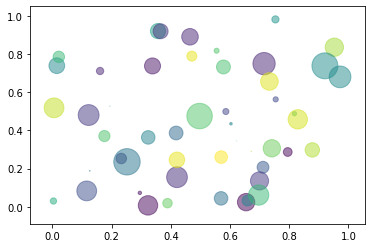

In [5]:
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

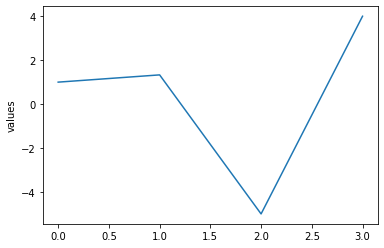

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #引入模块

plt.plot([1, 1.33, -5, 4])
plt.ylabel('values')
plt.show()

plt.plot()只有一个输入列表或数组时，参数被当作Y轴，X轴以索引自动生成。


当有两个以上参数时，按照X轴和Y轴顺序绘制数据点。

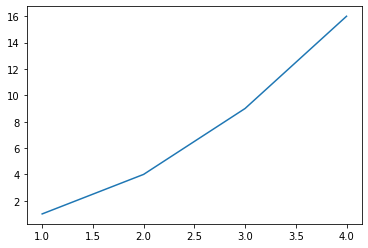

In [13]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

除了根据数据绘图，.plot()方法还可以调整图像的各种“风格”。

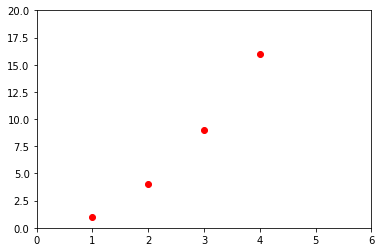

In [16]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

当然，画多个系列的数据也是可以滴！

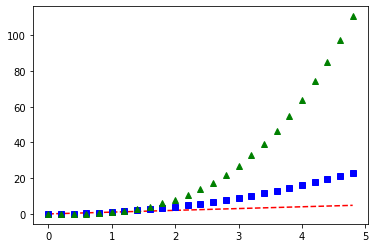

In [17]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### 1. pyplot的绘图区域

![](figure_axes_axis.jpeg)

![](figure_axes_axis_2.jpeg)

![](figure_axes_axis_3.jpeg)

一个figure(画布)上，可以有多个区域axes(坐标系)，我们在每个坐标系上绘图，也就是说每个axes(坐标系)中，都有一个axis(坐标轴)。

创建figure(画布)的两种方式

隐式创建figure对象

当第一次执行plt.xxx()画图代码时，系统会去判断是否已经有了figure对象，如果没有，系统会自动创建一个figure对象，并且在这个figure之上，自动创建一个axes坐标系(注意：默认创建一个figure对象，一个axes坐标系)。

也就是说，如果我们不设置figure对象，那么一个figure对象上，只能有一个axes坐标系，即我们只能绘制一个图形。

② 隐式创建figure对象存在的问题

优势：如果只是绘制一个小图形，那么直接使用plt.xxx()的方式，会自动帮我们创建一个figure对象和一个axes坐标系，这个图形最终就是绘制在这个axes坐标系之上的。

劣势：如果我们想要在一个figure对象上，绘制多个图形，那么我们就必须拿到每个个axes对象，然后调用每个位置上的axes对象，就可以在每个对应位置的坐标系上，进行绘图，如下图所示。注意：如果figure对象是被默认创建的，那么我们根本拿不到axes对象。因此，需要我们显示创建figure对象。

显示创建figure对象：以后的文章会详细讲述布局设置

手动创建一个figure对象

figure = plt.figure()

获取每个位置的axes对象

axes1 = figure.add_subplot(2,1,1)

axes2 = figure.add_subplot(2,1,2)

![](figure_axes_axis_4.jpeg)


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


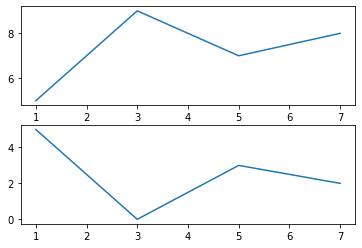

In [18]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 1, 1)
axes2 = fig.add_subplot(2, 1, 2)

#plt.plot()
axes1.plot([1, 3, 5, 7], [5, 9, 7, 8])
axes2.plot([1, 3, 5, 7], [5, 0, 3, 2])
fig.show()

也可以在默认figure的条件下，使用plt.subplot()方法来创建若干绘图区。

plt.subplot(nrows, ncols, plot_number)

在全局绘图区域中创建一个分区体系，并定位到一个子绘图区域。

【例】

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

a = np.arange(0.0, 5.0, 0.02)

plt.subplot(2, 1, 1)
plt.plot(a, f(a))

plt.subplot(2, 1, 2)
plt.plot(a, np.cos(2*np.pi*a), 'r--')

plt.show()

### 2. pyplot的plot()函数

plt.plot(x,y,format_string,**kwargs)

[全部参数](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)

参数|说明
:--|:--
x|X轴数据，列表或数组，可选。
y|Y轴数据，列表或数组。
format_string|控制曲线的格式字符串，可选。
kwargs|第二组或更多(x,y,format_string) 即绘制多条曲线

当绘制多条曲线时，各条曲线的x不能省略。

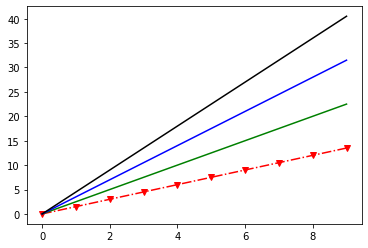

In [23]:
a = np.arange(10)
plt.plot(a,a*1.5,"vr-.", a,a*2.5,"g", a,a*3.5,"b", a,a*4.5, "k")
plt.show()

format_string：控制曲线的格式字符串，可选。由颜色字符、风格字符和标记字符组成。

颜色字符|说明|颜色字符|说明
:--|:--|:--|:--
'b'|蓝色|'m'|洋红色magenta
'g'|绿色|'y'|黄色
'r'|红色|'k'|黑色
'c'|青绿色cyan|'w'|白色
'#008000'|RGB某颜色|'0.8'|灰度值字符串

风格字符|说明|风格字符|说明
:--|:--|:--|:--
'\_'|实线|'--'|破折号
‘-.’|点画线|‘’或'  '|无线条

标记字符|说明|标记字符|说明
:--|:--|:--|:--
‘.’|点标记|‘,’|像素标记(极小点）
‘o’|实心圈标记|‘v’|倒三角标记
‘^’|上三角标记|‘>’|右三角标记
‘<’|左三角标记|‘1’|下花三角标记
‘2’|下花三角标记|‘3’|左花三角标记
‘4’|右花三角标记|'s'|实心方形标记
'p’|实心五角标记|‘\*’|星形标记
‘h’|竖六边形标记|‘H’|横六边形标记
‘+’|十字标记|‘x’|x标记
‘D’|菱形标记|‘d’|瘦菱形标记
‘\’|竖线是垂直线标记

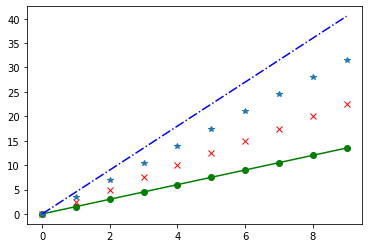

In [24]:
a=np.arange(10)
plt.plot(a,a*1.5,"go-",a,a*2.5,'rx',a,a*3.5,'*',a,a*4.5,'b-.')   #颜色字符、风格字符、标记字符组合使用
plt.show()


参数|说明
:--|:--
** kwargs|第二组或更多（x,y,format_string）
color|控制颜色，color='green'
linestyle|线条风格，linestyle=‘dashed’
marker|标记风格，marker=‘0’
markerfacecolor|标记颜色，markerfacecolor='blue'
markersize|标记尺寸，markersize=20

### pyplot的中文显示方法

第一种方法 这种方法会使坐标轴中数字的字体等也随之改变

pyplot并不默认支持中文显示，需要rcParams修改字体实现。

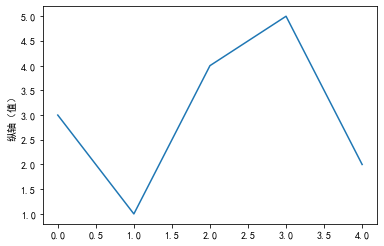

In [28]:
import matplotlib
matplotlib.rcParams['font.family']='SimHei'   #黑体
plt.plot([3,1,4,5,2])
plt.ylabel('纵轴（值）')
plt.savefig('test',dpi=800)
plt.show()


rcParams的属性

属性|说明
:--|:--
‘font.family’|用于显示字体的名字
 ‘font.style'|字体风格，正常'normal'或斜体'italic'
  'font.size'|字体太小，整数字号或者'large'、'x-small'
  
rcParams\[‘font.family’\]可以设置为以下几种字体

中文字体|说明
:--|:--
  'SimHei'|中文黑体
   'Kaiti'|中文楷体 
   'LiSu'|中文隶书
  ‘FangSong’|中文仿宋
  ‘YouYuan’|中文幼圆
  ‘STSong’|华文宋体
  
第二种方法

在有中文输出的地方，增加一个属性：fontproperties.这种方法能有效的在特定需要输入中文地方确定中文的字体和字号。

d:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


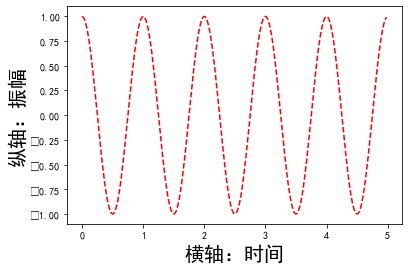

In [29]:
a=np.arange(0.0,5.0,0.02)
plt.xlabel('横轴：时间',fontproperties='SimHei',fontsize=20)
plt.ylabel('纵轴：振幅',fontproperties='SimHei',fontsize=20)
plt.plot(a,np.cos(2*np.pi*a),'r--')
plt.show()


pyplot的文本显示方法

pyplot的文本显示函数

 函数|说明
 :--|:--
   plt.xlabel()|对X轴增加文本标签
   plt.ylabel()|对y轴增加文本标签
   plt.title()|对图形整体增加文本标签
   plt.text()|在任意位置增加文本         
   plt.annolate()|在图形中增加带箭头的注释

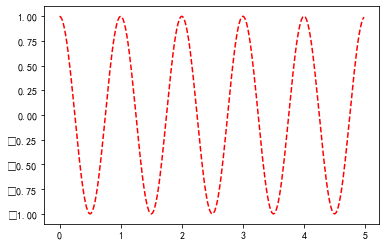

In [35]:
a=np.arange(0.0,5.0,0.02)   #起 0.0   止  5.0  步长 0.02
plt.plot(a,np.cos(2*np.pi*a),'r--')

plt.show()

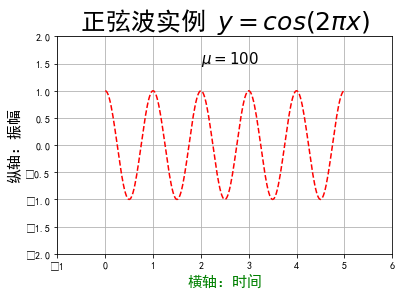

In [34]:
a=np.arange(0.0,5.0,0.02)   #起 0.0   止  5.0  步长 0.02
plt.plot(a,np.cos(2*np.pi*a),'r--')

plt.xlabel('横轴：时间',fontproperties='SimHei',fontsize=15,color='green')
plt.ylabel('纵轴：振幅',fontproperties='SimHei',fontsize=15)
plt.title(r'正弦波实例 $y=cos(2\pi x)$',fontproperties='SimHei',fontsize=25)   ##  $ Latex文本 $
plt.text(2,1.5,r'$\mu=100$',fontsize=15)

plt.axis([-1,6,-2,2])  #横纵坐标范围
plt.grid(True)   #加入网格曲线

plt.show()


plt.annotate(s,xy=arrow_crd,xytext=text_crd,arrowprops=dict)


参数|说明
:--|:--
s| 要注解的字符串
xy|箭头所在的位置
xy_text|表示文本显示的位置
arrowprops|是一个字典类型，定义了整个箭头的一些属性

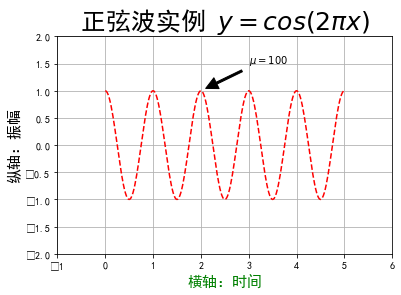

In [36]:
a=np.arange(0.0,5.0,0.02)   #起 0.0   止  5.0  步长 0.02
plt.plot(a,np.cos(2*np.pi*a),'r--')

plt.xlabel('横轴：时间',fontproperties='SimHei',fontsize=15,color='green')
plt.ylabel('纵轴：振幅',fontproperties='SimHei',fontsize=15)
plt.title(r'正弦波实例 $y=cos(2\pi x)$',fontproperties='SimHei',fontsize=25)   ##  $ Latex文本 $
plt.annotate(r'$\mu=100$',xy=(2,1),xytext=(3,1.5),
             arrowprops=dict(facecolor='black',shrink=0.1,width=2))
# width表示箭头的宽度为2   
#shrink表示从箭头的起始到结束按照0.1的比例箭头的两侧会缩进，使箭头里这个位置留有
#一小块空白

plt.axis([-1,6,-2,2])  #横纵坐标范围
plt.grid(True)   #加入网格曲线
plt.show()


pyplot的子绘图区域


plt.subplot2grid(GridSpec,CurSpec,colspan=1,rowspan=1)


理念：设定网路，选中网络，确定选中行列区域数量，编号从0开始。

plt.subplot2grid((3,3),(1,0),colspan=2)

(3,3)表示把一个区域分成3行3列，9块区域的基本类型

(1,0)表示当前选定的位置为第1行第0列

colspan=2表示列的延伸，及选定的单元格及列延伸一个单元格共两个单元格的长度

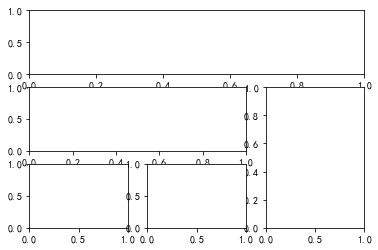

In [37]:
plt.subplot2grid((3,3),(0,0),colspan=3)
plt.subplot2grid((3,3),(1,0),colspan=2)
plt.subplot2grid((3,3),(1,2),rowspan=2)
plt.subplot2grid((3,3),(2,0))
plt.subplot2grid((3,3),(2,1))



这个方法每次调用都要重新对图形的设计做一个约束，可以用GridSpec类来简化其中的设计



<function matplotlib.pyplot.show(*args, **kw)>

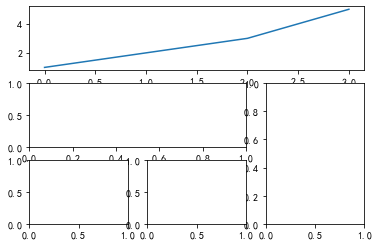

In [39]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3,3)

ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1,:-1]) # 0:-1 简写为  :-1
ax3 = plt.subplot(gs[1:,-1])  # 1:最后  简写为 1：
ax4 = plt.subplot(gs[2,0])
ax5 = plt.subplot(gs[2,1])

ax1.plot([1,2,3,5])

plt.show

pyplot的基础图表函数

函数|说明
:--|:--
plt.plot(x,y,fmt,…)|绘制一个坐标图
plt.boxplot(data,notch,position)|绘制一个箱形图
plt.bar(left,height,width,bottom)|绘制一个条形图
plt.barh(width,bottom,left,height)|绘制一个横向条形图
plt.polar(theta, r)|绘制极坐标图
plt.pie(data, explode)|绘制饼图

函数|说明
:--|:--
plt.psd(x,NFFT=256,pad_to,Fs)|绘制功率谱密度图
plt.specgram(x,NFFT=256,pad_to,F)|绘制谱图
plt.cohere(x,y,NFFT=256,Fs)|绘制X‐Y的相关性函数
plt.scatter(x,y)|绘制散点图，其中，x和y长度相同
plt.step(x,y,where)|绘制步阶图
plt.hist(x,bins,normed)|绘制直方图

函数|说明
:--|:--
plt.contour(X,Y,Z,N)|绘制等值图
plt.vlines()|绘制垂直图
plt.stem(x,y,linefmt,markerfmt)|绘制柴火图
plt.plot_date()|绘制数据日期

绘制饼图

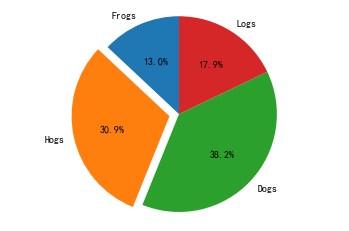

In [41]:
import numpy as np
import matplotlib.pyplot as plt

labels='Frogs','Hogs','Dogs','Logs'
sizes=[16,38,47,22]  #每一块占的百分比
explode=(0,0.1,0,0) #第二块往外移0.1

plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
# autopct ：显示百分数的方法
#shadow : 这个饼图是二维饼图还是带阴影的饼图效果
#startangle : 表示饼图起始的角度

plt.axis('equal')  #绘制图的时候x，y方向应该是相等的。画出的图是正圆的。
plt.show()

直方图

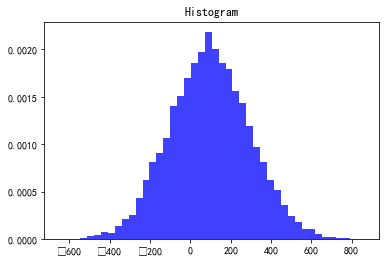

In [69]:
np.random.seed(0)  #设置随机种子
mu,sigma=100,200   #均值和标准差
a=np.random.normal(mu,sigma,size=10000)  #100个元素

plt.hist(a,'rice', density=True,histtype='stepfilled',facecolor='B',alpha=0.75)
# 20 生成的图中直方的个数 将数组a的取值范围均等的划分为20个区间
# normed=1 将直方中出现元素的个数归一化为该概率，normed=0则为在这个区域中元素出现的的个数
plt.title('Histogram')

plt.savefig('test02.png')
plt.show()

极坐标

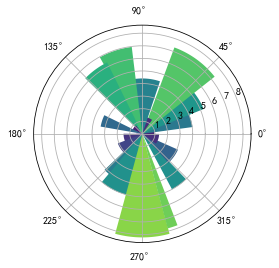

In [52]:
N=20  #绘制极坐标图中的数据的个数
theta=np.linspace(0.0,2*np.pi,N,endpoint=False)  #从零到360度按照个数等分出n个不同的角度
radii=10*np.random.rand(N)  #生成每一个角度对应的值
width=np.pi/4*np.random.rand(N)       #算出宽度值

ax=plt.subplot(111,projection='polar')   # 111即为生成1个网格，polar即指定为极坐标 形成一个对象为ax
bars= ax.bar(theta,radii,width=width,bottom=0.0)
#theta 即为left 表示绘制极坐标区域中的颜色从哪开始
#radii 即为height 表示中心点向边缘绘制的长度
#width  即为宽度 每个绘图区域的面积，角度范围内辐射的面积

#循环对每一个绘制极坐标区域的颜色进行设定
for r,bar in zip(radii,bars):
    bar.set_facecolor(plt.cm.viridis(r/10.))
    
plt.show()

散点图

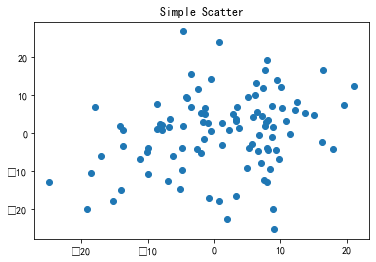

In [53]:
fig,ax=plt.subplots()    #参数为空，默认绘制区域是111
ax.plot(10*np.random.randn(100),10*np.random.randn(100),'o')  #randn生成横纵坐标各扩大10倍
#randn生成正态分布的随机数

ax.set_title('Simple Scatter')

plt.show()

感觉matplotlib不像Python？

以上的调用方式是面向过程的，新建画布，确定绘制图表类型，输入参数，确定生成图表，是不是很像点击图形用户界面的菜单？

事实上，更常用、更Pythonic的调用方式，是按照面向对象的方式来进行绘图。

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [75]:
# 创建一个10行4列的DataFrame
df = DataFrame(
    np.random.randint(1,10,40).reshape(10,4),
    columns = {'A','B','C','D'}
)

In [76]:
df

,D,A,C,B
0,5,2,1,8
1,4,6,7,9
2,4,4,4,1
3,9,9,1,4
4,5,9,6,4
5,7,4,8,2
6,4,1,6,4
7,3,1,5,9
8,5,5,2,5
9,9,3,5,2


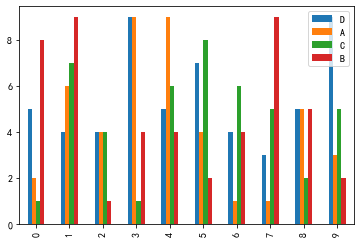

In [77]:
# kind='bar'是柱形图，默认为line
df.plot(kind='bar')
plt.show()

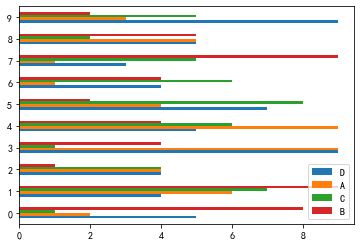

In [78]:
# 横柱形图
df.plot(kind='barh')
plt.show()

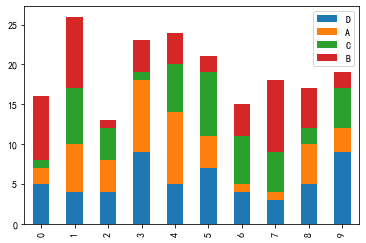

In [79]:
# stacked=True堆叠
df.plot(kind='bar',stacked=True)
plt.show()

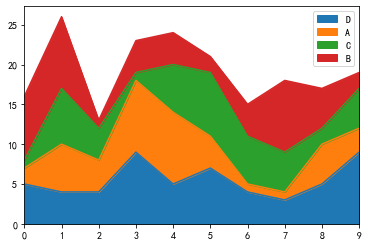

In [80]:
df.plot(kind='area')
plt.show()

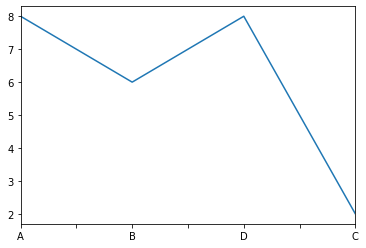

In [12]:
# 画一行
df.iloc[5].plot()
plt.show()

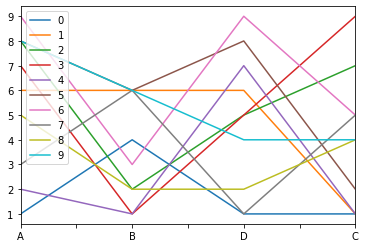

In [13]:
# 画10行
for i in df.index:
    df.iloc[i].plot(label=str(i))
plt.legend()
plt.show()

![](matplotlib.png)
[图片地址](https://blog.csdn.net/weixin_37855575/article/details/102881469)